In [34]:
import stardate as sd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
iso_params = {"G": (11.1740, .0009),  # We'll just estimate the uncertainties for now.
              "J": (9.378, .21),
              "H": (8.77, .026),
              "K": (8.637, .023),
              "B": (14.62, 1.2),
              "V": (11.47, .2),
              "parallax": (15.4175, .0617)}  # Parallax in milliarcseconds.

In [5]:
# If you don't want to automatically save samples to disk (much faster):
star = sd.Star(iso_params, prot=17, prot_err=1, Av=.01447, Av_err=8e-5, savedir=".", filename="caroline_results")

In [11]:
nsteps = 50000
star.fit(max_n=nsteps, save_samples=True)

100%|██████████| 50000/50000 [13:09<00:00, 63.32it/s]

nsteps 500 burnin 0


In [12]:
median_age, age_errp, age_errm, age_samples = star.age_results()
print("Age = {0:.2f} + {1:.2f} - {2:.2f} Gyr".format(median_age, age_errp, age_errm))

Age = 9.46 + 8.25 - 3.23 Gyr


In [13]:
from stardate import load_samples, read_samples

# Load the samples.
flatsamples, _3Dsamples, posterior_samples, prior_samples = load_samples(
    "caroline_results.h5", burnin=0)

# Extract the median and maximum likelihood parameter estimates from the samples.
results = read_samples(flatsamples)

# Print the results as a pandas dataframe.
results

,EEP_med,EEP_errm,EEP_errp,EEP_std,EEP_ml,age_med_gyr,age_errm,age_errp,age_std,age_ml_gyr,...,distance_errm,distance_errp,distance_std_pc,distance_ml,Av_med,Av_errm,Av_errp,Av_std,Av_ml,index
0,333.114981,56.112988,7.527061,27.502484,276.498816,9.46227,8.251064,3.231527,4.845622,1.188933,...,0.274589,0.288331,5.697834,64.865979,0.01447,0.000081,0.000082,0.000175,0.014473,0


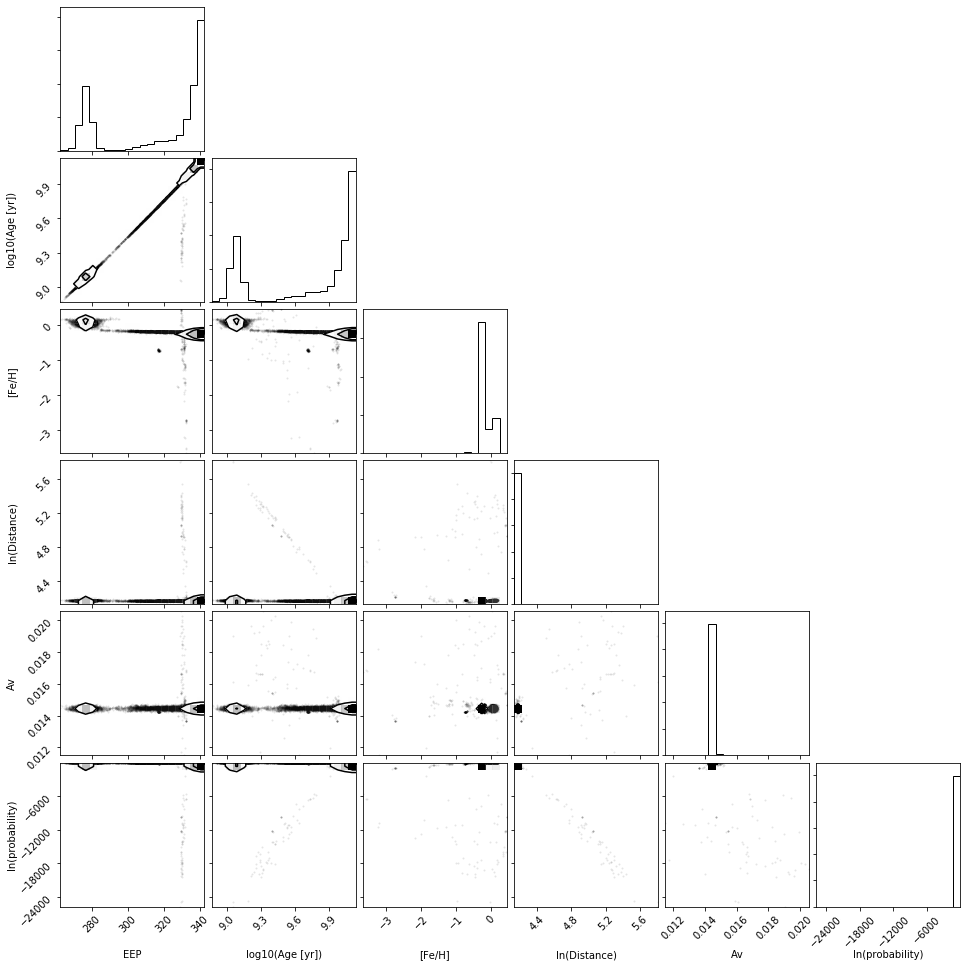

In [14]:
import corner

labels = ["EEP", "log10(Age [yr])", "[Fe/H]", "ln(Distance)", "Av", "ln(probability)"]

corner.corner(flatsamples, labels=labels);

In [16]:
df = pd.read_csv("/Users/rangus/projects/data/mcquillan_kinematic_ages.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


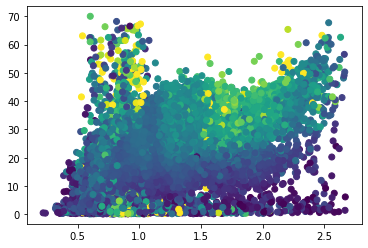

In [24]:
plt.scatter(df.bp_dered - df.rp_dered, df.Prot, c=df.kinematic_age, vmin=0, vmax=10)

(3, 75)

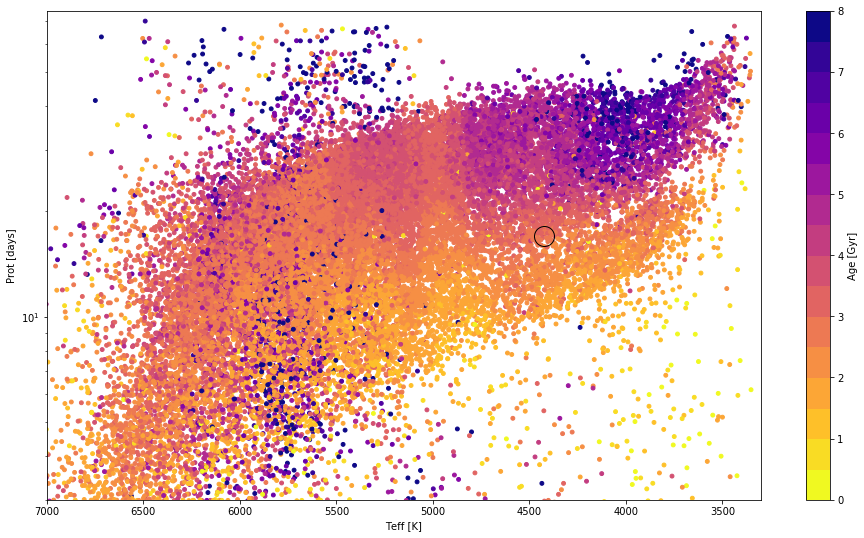

In [44]:
import matplotlib
vmin, vmax = 0, 8

cmap = plt.cm.plasma_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(vmin, vmax, 17)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9))
plt.scatter(df.color_teffs, df.Prot, c=df.kinematic_age, s=15, vmin=vmin, vmax=vmax, cmap=cmap, norm=norm)
plt.colorbar(label="Age [Gyr]")
plt.plot(4425, 17, "o", mec="k", color="none", ms=20)
plt.yscale("log")
plt.gca().invert_xaxis()
plt.xlabel("Teff [K]")
plt.ylabel("Prot [days]");
plt.xlim(7000, 3300)
plt.ylim(3, 75)

(3, 75)

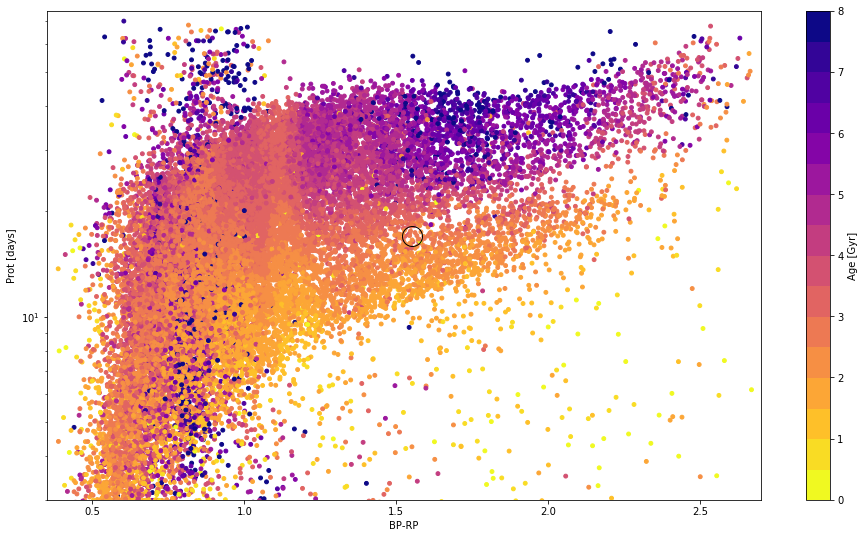

In [47]:
import matplotlib
vmin, vmax = 0, 8

cmap = plt.cm.plasma_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(vmin, vmax, 17)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9))
plt.scatter(df.bp_dered - df.rp_dered, df.Prot, c=df.kinematic_age, s=15, vmin=vmin, vmax=vmax, cmap=cmap, norm=norm)
plt.colorbar(label="Age [Gyr]")
plt.plot(11.925369-10.37407, 17, "o", mec="k", color="none", ms=20)
plt.yscale("log")
plt.xlabel("BP-RP")
plt.ylabel("Prot [days]");
plt.xlim(.35, 2.7)
plt.ylim(3, 75)